In [1]:
from torch import nn

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__() # python3では引数省略可能
        self.layer = nn.Linear(1, 1, bias=True)

    def forward(self, x):
        y = self.layer(x)
        return y

00000/01000 loss=107.65723
00001/01000 loss=100.63863
00002/01000 loss=91.12714
00003/01000 loss=92.20415
00004/01000 loss=90.84221
00005/01000 loss=95.53654
00006/01000 loss=83.98332
00007/01000 loss=84.98796
00008/01000 loss=86.26524
00009/01000 loss=74.16202
00010/01000 loss=78.36686
00011/01000 loss=66.74281
00012/01000 loss=68.34111
00013/01000 loss=69.30623
00014/01000 loss=59.51833
00015/01000 loss=63.59545
00016/01000 loss=55.51397
00017/01000 loss=53.48489
00018/01000 loss=57.01338
00019/01000 loss=55.30901
00020/01000 loss=52.00075
00021/01000 loss=45.76302
00022/01000 loss=37.76292
00023/01000 loss=39.77258
00024/01000 loss=41.34058
00025/01000 loss=37.60379
00026/01000 loss=34.47727
00027/01000 loss=31.43429
00028/01000 loss=39.62786
00029/01000 loss=29.72592
00030/01000 loss=32.22892
00031/01000 loss=30.80690
00032/01000 loss=33.81553
00033/01000 loss=28.61055
00034/01000 loss=26.59696
00035/01000 loss=28.09355
00036/01000 loss=26.89697
00037/01000 loss=19.25564
00038/0100

00333/01000 loss=0.02449
00334/01000 loss=0.02307
00335/01000 loss=0.01921
00336/01000 loss=0.02069
00337/01000 loss=0.02217
00338/01000 loss=0.01380
00339/01000 loss=0.01174
00340/01000 loss=0.01453
00341/01000 loss=0.02837
00342/01000 loss=0.01321
00343/01000 loss=0.01570
00344/01000 loss=0.01437
00345/01000 loss=0.02105
00346/01000 loss=0.01973
00347/01000 loss=0.01470
00348/01000 loss=0.01240
00349/01000 loss=0.00952
00350/01000 loss=0.01398
00351/01000 loss=0.01935
00352/01000 loss=0.01477
00353/01000 loss=0.01047
00354/01000 loss=0.01368
00355/01000 loss=0.02344
00356/01000 loss=0.01050
00357/01000 loss=0.00991
00358/01000 loss=0.00889
00359/01000 loss=0.00603
00360/01000 loss=0.01174
00361/01000 loss=0.01392
00362/01000 loss=0.01013
00363/01000 loss=0.02501
00364/01000 loss=0.01288
00365/01000 loss=0.01433
00366/01000 loss=0.01559
00367/01000 loss=0.01660
00368/01000 loss=0.01488
00369/01000 loss=0.01588
00370/01000 loss=0.01665
00371/01000 loss=0.02075
00372/01000 loss=0.01935


00760/01000 loss=0.00703
00761/01000 loss=0.00473
00762/01000 loss=0.00334
00763/01000 loss=0.00247
00764/01000 loss=0.00408
00765/01000 loss=0.00402
00766/01000 loss=0.00461
00767/01000 loss=0.00270
00768/01000 loss=0.00342
00769/01000 loss=0.00290
00770/01000 loss=0.00413
00771/01000 loss=0.00332
00772/01000 loss=0.00225
00773/01000 loss=0.00432
00774/01000 loss=0.00145
00775/01000 loss=0.00303
00776/01000 loss=0.00291
00777/01000 loss=0.00386
00778/01000 loss=0.00439
00779/01000 loss=0.00524
00780/01000 loss=0.00509
00781/01000 loss=0.00209
00782/01000 loss=0.00306
00783/01000 loss=0.00692
00784/01000 loss=0.00151
00785/01000 loss=0.00394
00786/01000 loss=0.00119
00787/01000 loss=0.00510
00788/01000 loss=0.00353
00789/01000 loss=0.00536
00790/01000 loss=0.00218
00791/01000 loss=0.00265
00792/01000 loss=0.00487
00793/01000 loss=0.00427
00794/01000 loss=0.00449
00795/01000 loss=0.00486
00796/01000 loss=0.00202
00797/01000 loss=0.00104
00798/01000 loss=0.00500
00799/01000 loss=0.00225


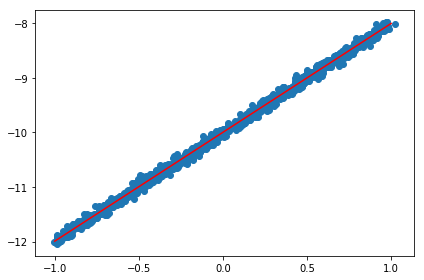

In [5]:
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn
from torch import optim


# 線形回帰モデルの定義                                                          
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(1, 1, bias=True)

    def forward(self, x):
        y = self.layer(x)
        return y

# ここからmain                                                                  
if __name__ == '__main__':

    # GPUかCPUかを自動設定                                                      
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # modelとoptimizerの定義                                                    
    model = LinearRegression().to(device)
    opt = optim.SGD(model.parameters(), lr=0.01)

    # data生成                                                                  
    n = 1000
    x = torch.rand(n)*2-1
    a, b = 2.0, -10.0 # weight & bias                                           
    y = a*x+b

    # dataにノイズ追加                                                          
    x = x + torch.randn(n)*0.02
    y = y + a*torch.randn(n)*0.02

    # to GPU                                                                    
    x = x.to(device)
    y = y.to(device)

    bs = 10 # batch_size                                                        
    niter = 1000
    losses = []
    for iiter in range(niter):

        # batch dataの取得                                                      
        r = np.random.choice(n, bs, replace=False)
        bx = x[r].reshape(-1,1)
        by = y[r].reshape(-1,1)

        # forwardとloss計算                                                     
        y_ = model.forward(bx)
        loss = torch.mean((y_ - by)**2)

        # 最適化                                                                
        opt.zero_grad() # 勾配初期化                                            
        loss.backward() # 勾配計算(backward)                                    
        opt.step() # パラメータ更新                                             

        print('%05d/%05d loss=%.5f' % (iiter, niter, loss.item()))
        losses.append(loss.item())

    # 重みの取り出し                                                            
    a_ = model.layer.weight.detach().to('cpu').numpy()
    b_ = model.layer.bias.detach().to('cpu').numpy()
    print('a=%.3f b=%.3f' % (a_[0] ,b_[0]))

    # データと最適化した関数のplot
    xnp = x.detach().to('cpu').numpy()             
    ynp = y.detach().to('cpu').numpy()
    plt.scatter(xnp, ynp)
    x = np.linspace(-1,1,100)
    y = a_[0]*x + b_[0]
    plt.plot(x, y, c='r')
#     plt.savefig('output.png')
    plt.tight_layout()